# Data Processing

In [0]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [5]:
dataTitanic = pd.read_csv("titanic_train.csv")

#for i in dataTitanic:
#  print(i, dataTitanic[i].dtypes)
#  if dataTitanic[i].isna().values.any() and dataTitanic[i].dtypes != object:
#      dataTitanic[i] = dataTitanic[i].fillna(dataTitanic[i].mean())

for i in dataTitanic:
  print(i, dataTitanic[i].dtypes, dataTitanic[i].isna().sum())


passenger_id int64 0
pclass int64 0
name object 0
sex object 0
age float64 174
sibsp int64 0
parch int64 0
ticket object 0
fare float64 1
cabin object 659
embarked object 1
boat object 542
body float64 777
home.dest object 386
survived int64 0


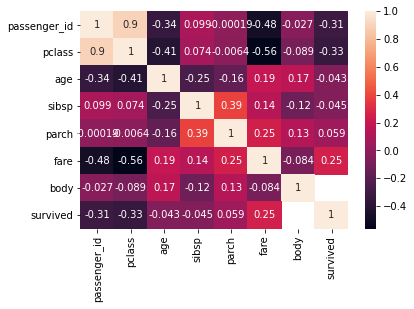

In [6]:
# missing values - age
corr_matrix = dataTitanic.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.show()
dataTitanic["age"] = dataTitanic.groupby(["pclass"])["age"].transform("mean")

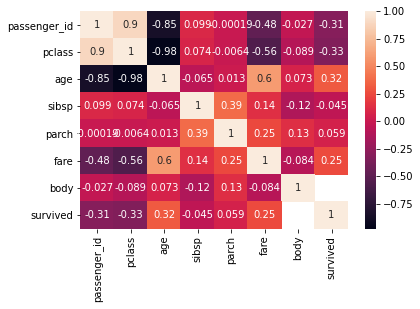

In [7]:
# missing values - fare
corr_matrix = dataTitanic.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.show()
dataTitanic["fare"] = dataTitanic.groupby(["pclass"])["fare"].transform("mean")

In [0]:
# missing values - cabin
dataTitanic["cabin"] = dataTitanic["cabin"].fillna('U')


In [9]:
# missing values - embarked 
print(dataTitanic[dataTitanic['embarked'].isnull()])
dataTitanic['embarked'] = dataTitanic['embarked'].fillna('S')

for i in dataTitanic:
  print(i, dataTitanic[i].dtypes, dataTitanic[i].isna().sum())


     passenger_id  pclass                 name  ... body  home.dest  survived
109           168       1  Icard, Miss. Amelie  ...  NaN        NaN         1

[1 rows x 15 columns]
passenger_id int64 0
pclass int64 0
name object 0
sex object 0
age float64 0
sibsp int64 0
parch int64 0
ticket object 0
fare float64 0
cabin object 0
embarked object 0
boat object 542
body float64 777
home.dest object 386
survived int64 0


In [10]:
# transform - cabin
print(dataTitanic["cabin"])
dataTitanic["cabin"] = dataTitanic["cabin"].map(lambda x: x[0])
print(dataTitanic["cabin"])


0        U
1        U
2        U
3        U
4        U
      ... 
845    C39
846    B37
847      U
848      U
849      U
Name: cabin, Length: 850, dtype: object
0      U
1      U
2      U
3      U
4      U
      ..
845    C
846    B
847    U
848    U
849    U
Name: cabin, Length: 850, dtype: object


In [0]:
# new column - Family Size
dataTitanic["famsize"] = dataTitanic["parch"] + dataTitanic["sibsp"] + 1

In [12]:
# convert nominal

encode = preprocessing.LabelEncoder()
dataTitanic["sex"] = encode.fit_transform(dataTitanic["sex"])
dataTitanic["embarked"] = encode.fit_transform(dataTitanic["embarked"])
dataTitanic["cabin"] = encode.fit_transform(dataTitanic["cabin"])

for i in dataTitanic:
  print(i, dataTitanic[i].dtypes, dataTitanic[i].isna().sum())


passenger_id int64 0
pclass int64 0
name object 0
sex int64 0
age float64 0
sibsp int64 0
parch int64 0
ticket object 0
fare float64 0
cabin int64 0
embarked int64 0
boat object 542
body float64 777
home.dest object 386
survived int64 0
famsize int64 0


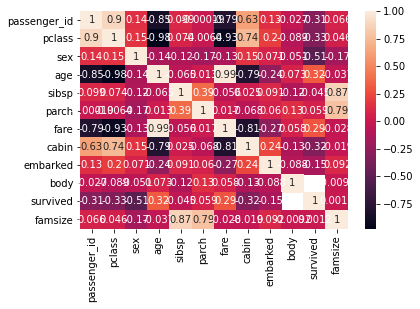

In [13]:
corr_matrix = dataTitanic.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.show()

X = dataTitanic[["pclass", "sex", "age", "cabin"]]
Y = dataTitanic["survived"]

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2)


# KNN

In [14]:
KNN = KNeighborsClassifier(n_neighbors = 3).fit(XTrain, YTrain)
CTest  = KNN.predict(XTest)
CTrain  = KNN.predict(XTrain)
print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))


Train set acc:  0.7926470588235294
Test set acc:  0.8294117647058824


In [15]:
Ks = 30
accTrain = np.zeros((Ks-1))
accTest = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1, Ks):    
    KNN = KNeighborsClassifier(n_neighbors = n).fit(XTrain, YTrain)
    CTest  = KNN.predict(XTest)
    CTrain  = KNN.predict(XTrain)
    accTrain[n - 1] = metrics.accuracy_score(YTrain, CTrain)
    accTest[n - 1] = metrics.accuracy_score(YTest, CTest)
    
print("Best  ACC Training : %.2f" % accTrain.max(), ", with k = ", accTrain.argmax() + 1)
print("Best  ACC Testing : %.2f" % accTest.max(), ", with k = ", accTest.argmax() + 1)



Best  ACC Training : 0.80 , with k =  2
Best  ACC Testing : 0.83 , with k =  3


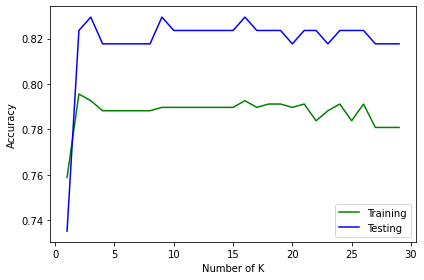

In [16]:
plt.plot(range(1,Ks), accTrain,"g")
plt.plot(range(1,Ks), accTest,"b")
plt.legend(("Training", "Testing"))
plt.ylabel("Accuracy")
plt.xlabel("Number of K")
plt.tight_layout()
plt.show()

# Logistic Regression

In [17]:
LGR = LogisticRegression().fit(XTrain, YTrain)
CTest  = LGR.predict(XTest)
CTrain  = LGR.predict(XTrain)
print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))

Train set acc:  0.7720588235294118
Test set acc:  0.7764705882352941


Train set acc:  1.0
Test set acc:  0.9473684210526315


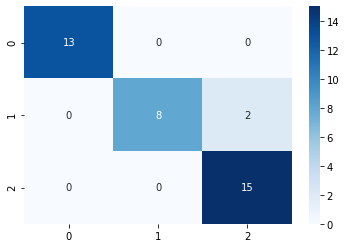

In [32]:
irisData = pd.read_csv("iris.csv")
X = irisData[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
Y = irisData["species"]
XTrain, XTest, YTrain, YTest = train_test_split(X, Y)
LGR = LogisticRegression(max_iter=10000).fit(XTrain, YTrain)
CTest  = LGR.predict(XTest)
CTrain  = LGR.predict(XTrain)
print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))
cf_matrix = metrics.confusion_matrix(YTest, CTest)
sb.heatmap(cf_matrix, cmap="Blues", annot=True)
plt.show()

# SVM

In [19]:
X = dataTitanic[["pclass", "sex", "age", "cabin"]]
Y = dataTitanic["survived"]

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2)

SVM = SVC().fit(XTrain, YTrain)
CTest  = SVM.predict(XTest)
CTrain  = SVM.predict(XTrain)
print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))

Train set acc:  0.711764705882353
Test set acc:  0.6470588235294118


Train set acc:  0.9642857142857143
Test set acc:  1.0


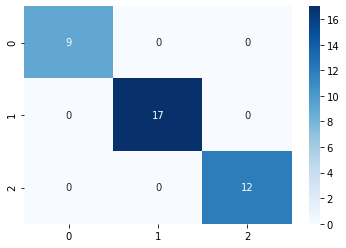

In [33]:
X = irisData[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
Y = irisData["species"]
XTrain, XTest, YTrain, YTest = train_test_split(X, Y)
SVM = SVC().fit(XTrain, YTrain)
CTest  = SVM.predict(XTest)
CTrain  = SVM.predict(XTrain)
print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))
cf_matrix = metrics.confusion_matrix(YTest, CTest)
sb.heatmap(cf_matrix, cmap="Blues", annot=True)
plt.show()

# Decision Tree

In [21]:
X = dataTitanic[["pclass", "sex", "age", "cabin"]]
Y = dataTitanic["survived"]

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2)

DST = DecisionTreeClassifier(criterion="gini").fit(XTrain, YTrain)
CTest  = DST.predict(XTest)
CTrain  = DST.predict(XTrain)
print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))

Train set acc:  0.8058823529411765
Test set acc:  0.7941176470588235


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


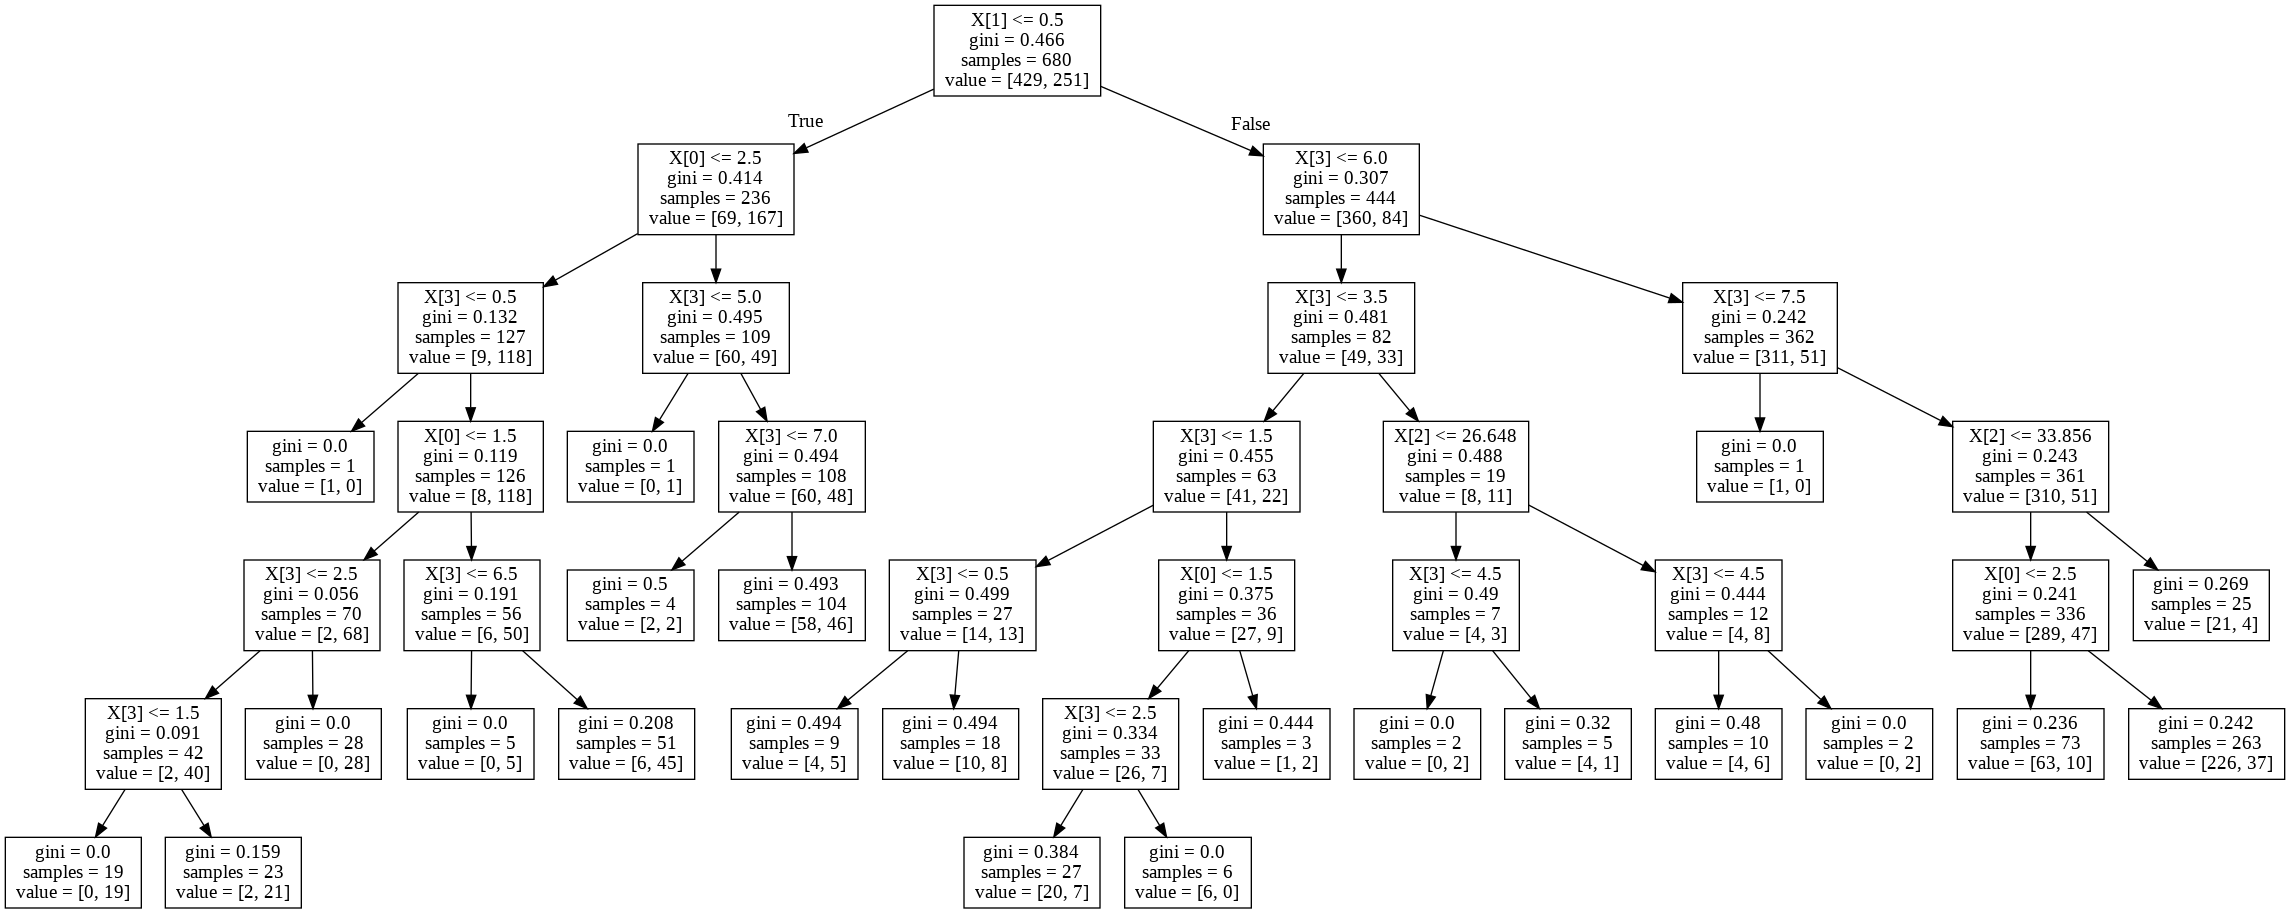

In [22]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

output = StringIO()
export_graphviz(DST, out_file = output)
graph = pydotplus.graph_from_dot_data(output.getvalue())  
Image(graph.create_png())